# Import Statements

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

## Summary
- Use HTML Markdown in Notebooks, such as section headings # and how to embed images with the <img> tag.
- Combine the `groupby()` and `count()` functions to aggregate data
- Use the `.value_counts()` function
- Slice DataFrames using the square bracket notation e.g., `df[:-2]` or `df[:10]`
- Use the `.agg()` function to run an operation on a particular column
- `rename()` columns of DataFrames
- Create a line chart with two separate axes to visualise data that have different scales.
- Create a scatter plot in Matplotlib
- Work with tables in a relational database by using primary and foreign keys
- `.merge()` DataFrames along a particular column
- Create a bar chart with Matplotlib

**Challenge**: How many colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [`.nunique()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [51]:
colors_df = pd.read_csv('data/lego/colors.csv')

In [52]:
colors_df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [53]:
colors_df.nunique()

id          135
name        135
rgb         124
is_trans      2
dtype: int64

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [54]:
colors_df[colors_df['is_trans'] == 'f'].count()

id          107
name        107
rgb         107
is_trans    107
dtype: int64

In [55]:
colors_df.is_trans.value_counts()

f    107
t     28
Name: is_trans, dtype: int64

In [56]:
colors_df.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store, and you will see their products organised by a theme. Their themes include Star Wars, Batman, Harry Potter and many more.

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many sets.

The <code>sets.csv</code> data contains a list of sets over the years, and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [57]:
sets_df = pd.read_csv('data/lego/sets.csv')

In [58]:
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [59]:
sets_df.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [60]:
sets_df.sort_values('year')

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
...,...,...,...,...,...
11289,75290-1,Mos Eisley Cantina,2020,158,0
5147,41430-1,Summer Fun Water Park,2020,494,1012
11337,75550-1,Minions Kung Fu Battle,2021,689,0
11335,75547-1,Minion Pilot in Training,2021,689,0


**Challenge**: How many sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [61]:
sets_df[sets_df['year'] == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [62]:
sets_df.sort_values('num_parts', ascending=False).head(5)

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [63]:
sets_by_year = sets_df.groupby('year').count()
sets_by_year['set_num'].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

In [64]:
sets_by_year['set_num'].tail()

year
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, dtype: int64

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

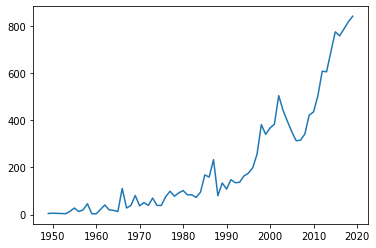

In [72]:
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [76]:
themes_by_year = sets_df.groupby('year').agg({'theme_id':pd.Series.nunique})
themes_by_year.rename(columns={'theme_id':'nr_themes'}, inplace=True)

In [77]:
themes_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

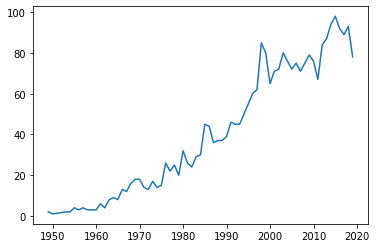

In [79]:
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])

### Line Charts with Two Seperate Axes

Text(0, 0.5, 'Number of themes')

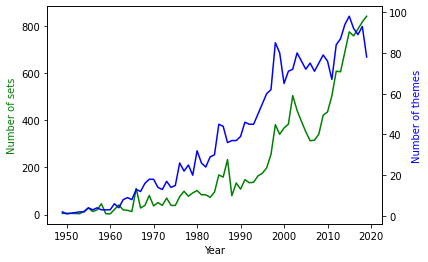

In [85]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2], color='green')
ax2.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2], color='blue')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of sets', color='green')
ax2.set_ylabel('Number of themes', color='blue')

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [99]:
parts_per_set = sets_df.groupby('year').agg({'theme_id':pd.Series.nunique, 'num_parts':'mean'})
parts_per_set.rename(columns={'theme_id':'nr_themes', 'num_parts':'avg_parts'}, inplace=True)
parts_per_set.head()

,nr_themes,avg_parts
year,,
1949,2,99.600000
1950,1,1.000000
1953,2,13.500000
1954,2,12.357143
1955,4,36.607143


In [97]:
parts_per_set.tail()

,nr_themes,avg_parts
year,,
2017,89,221.840967
2018,93,213.618873
2019,78,207.510714
2020,82,259.732938
2021,1,0.000000


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

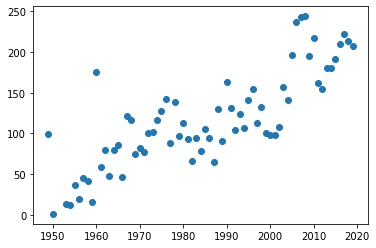

In [101]:
plt.scatter(parts_per_set.index[:-2], parts_per_set.avg_parts[:-2])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heroes to many others. But which theme has the largest number of individual sets?

In [105]:
set_theme_count = sets_df['theme_id'].value_counts()
set_theme_count.head()

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

Database schema: https://i.imgur.com/Sg4lcjx.png

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [106]:
themes_df = pd.read_csv('data/lego/themes.csv')

In [109]:
themes_df.tail()

,id,name,parent_id
591,705,Iron Man,696.0
592,706,Spider-Man,696.0
593,707,X-Men,696.0
594,708,The LEGO Batman Movie,697.0
595,709,LEGO Art,NaN


In [112]:
themes_df[themes_df.name == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [113]:
sets_df[sets_df.theme_id == 209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


### Merging (i.e., Combining) DataFrames based on a Key

In [117]:
set_theme_count = sets_df['theme_id'].value_counts()
set_theme_count = pd.DataFrame(
    {
        'id': set_theme_count.index,
        'set_count': set_theme_count.values
    }
)

In [118]:
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [121]:
merged_df = pd.merge(set_theme_count, themes_df, on='id')
merged_df.sort_values('set_count', ascending=False).head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


<BarContainer object of 10 artists>

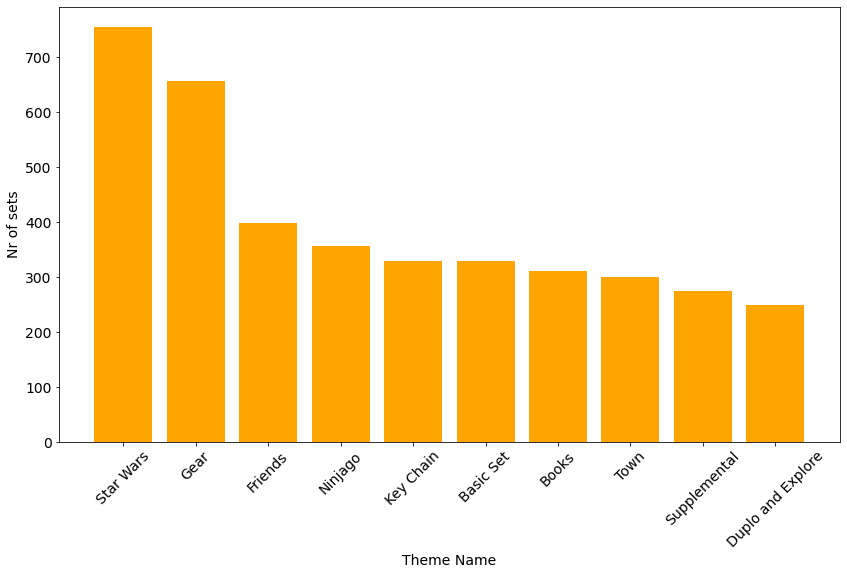

In [141]:
plt.figure(figsize=(14, 8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.xlabel('Theme Name', fontsize=14)
plt.ylabel('Nr of sets', fontsize=14)

plt.bar(merged_df.name[:10], merged_df.set_count[:10], color='orange')